In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

In [3]:
ticker = 'pg'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2010-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
r = 0.025
stdev = log_returns.std() * 250 ** 0.5

In [6]:
stdev = stdev.values

In [7]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [8]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [9]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [10]:
S

array([[174.78500366, 174.78500366, 174.78500366, ..., 174.78500366,
        174.78500366, 174.78500366],
       [176.25319968, 175.21395061, 175.18224958, ..., 177.05859503,
        172.17032   , 173.39613818],
       [174.69183721, 176.7427914 , 173.26439143, ..., 175.14679115,
        174.37310917, 171.12828458],
       ...,
       [185.86316095, 136.50142148, 219.67097837, ..., 138.21135346,
        218.40151316, 202.33941079],
       [188.5273055 , 138.31325268, 217.03354543, ..., 136.84016095,
        219.64847506, 204.61334352],
       [187.39451466, 134.56968203, 217.48362069, ..., 135.50609063,
        215.85720285, 201.57127722]])

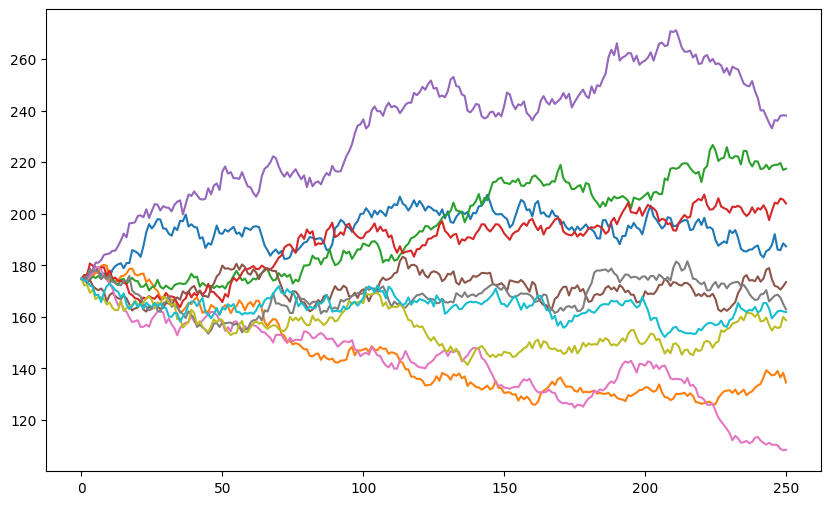

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])

In [12]:
p = np.maximum(S[-1] - 110, 0)
p

array([ 77.39451466,  24.56968203, 107.48362069, ...,  25.50609063,
       105.85720285,  91.57127722])

In [13]:
p.shape

(10000,)

In [14]:
c = np.exp(-r * T) * np.sum(p) / iterations

In [15]:
c

np.float64(67.71144931913034)

In [ ]:
''